In [1]:
import os
import random
from collections import defaultdict
from tqdm.autonotebook import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import cv2
from PIL import Image

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torch.nn.functional as F

from sklearn.metrics import balanced_accuracy_score

import warnings
# filter warnings
warnings.filterwarnings('ignore')

C:\Users\Nolan\AppData\Local\Temp\ipykernel_31192\3081382395.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [ ]:
data = [[0, 128, 255], [64, 192, 255], [128, 64, 0]]
plt.imshow(data, cmap='gray')
plt.show()

In [ ]:
data = [[[255, 0, 54], [128, 64, 64]], [[128, 255, 49], [64, 0, 12]], [[0, 128, 98], [255, 192, 70]]]
data = np.moveaxis(data, 0, -1)
plt.imshow(data)
plt.show()
data.shape


1080 images in train_signs
Number of examples for class 0: 180


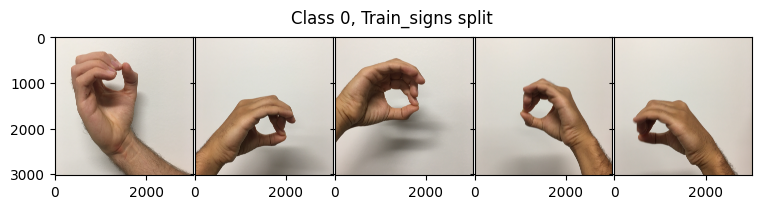

Number of examples for class 1: 180


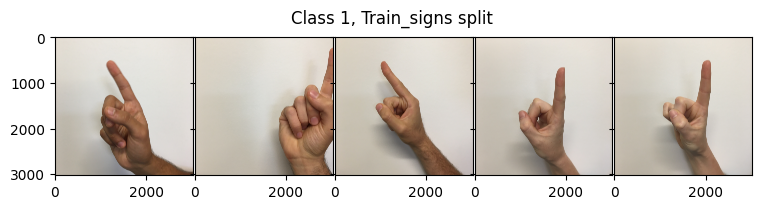

Number of examples for class 2: 180


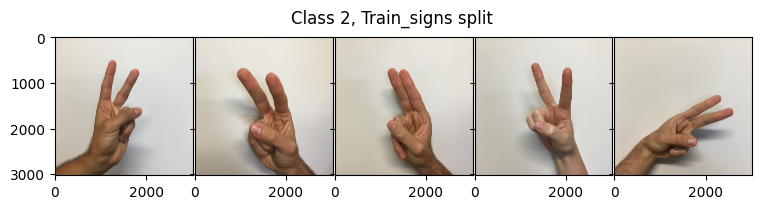

Number of examples for class 3: 180


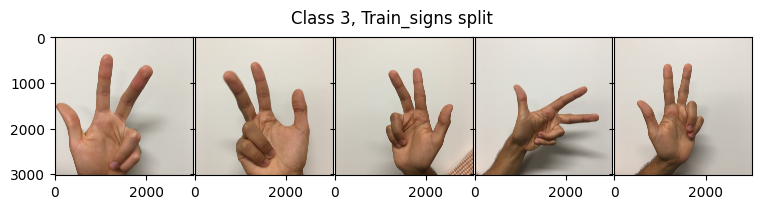

Number of examples for class 4: 180


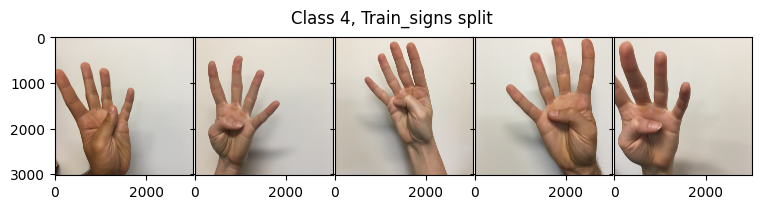

Number of examples for class 5: 180


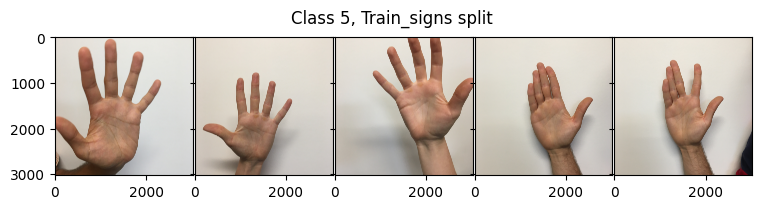

120 images in test_signs
Number of examples for class 0: 20
Number of examples for class 1: 20
Number of examples for class 2: 20
Number of examples for class 3: 20
Number of examples for class 4: 20
Number of examples for class 5: 20


In [49]:
data_path = os.path.join('SIGNS dataset')
splits = ['train_signs', 'test_signs']

for s in splits:
    folder = os.path.join(data_path, s)
    files = [f for f in os.listdir(folder) if f.endswith('.jpg')]
    print(f'{len(files)} images in {s}')

    # for each image, create a list of the type [class, filename]
    files = [f.split('_',1) for f in files]

    # group the data by class
    files_by_sign = defaultdict(list)
    for k, v in files:
        files_by_sign[k].append(v)
    
      # take random 4 images of each class  
    for k, v in sorted(files_by_sign.items()):
        print(f'Number of examples for class {k}:', len(v))

        # display several examples of images from the training sample   
        if s == 'train_signs':        
            random.seed(42)
        
            imgs_path = random.sample(v, 5)
            imgs_path = [os.path.join(data_path, f'{s}/{k}_{p}') for p in imgs_path]

            # read the image using the opencv library
            imgs = [cv2.imread(p) for p in imgs_path]
            # matplotlib expects img in RGB format but OpenCV provides it in BGR       
            # transform the BGR image into RGB
            imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imgs]

                  # create a figure for display
            fig = plt.figure(figsize=(9, 2))
            grid = ImageGrid(
                fig, 111, 
                nrows_ncols=(1, 5)
            )
            # display the image
            for ax, img in zip(grid, imgs):
                ax.imshow(img)

            fig.suptitle(f'Class {k}, {s.capitalize()} split')
            plt.show()

